#### Read weather data, analyse it and send to Node-RED


In [129]:
#This this a notebook with python code

In [3]:
import os
import pickle
import time
from collections import namedtuple
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import json

In [4]:
#You can execute unic commands
#!ls -l /

In [5]:
#Need to insert the code for reading file from the 0101menu
###>>>>>>>
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a82a481a877d408d84aeee9376d1c0ff = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DGE21356jgs12wjI3nsgUlxk3wY-5TeeZcMBw2ZPcr-f',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a82a481a877d408d84aeee9376d1c0ff.get_object(Bucket='daxweatherproject-donotdelete-pr-eni1p1ms84lz5a',Key='IBERLINB54_weather.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_raw = pd.read_csv(body)
#####<<<<<<
# Read Weather Statiom file 
station = 'IBERLINB54' # Edinburgh or Berlin

data_raw['Date Time'] = pd.to_datetime(data_raw['Time'])
data_raw = data_raw.set_index('Time',drop=True)
data_raw.index.name = 'datetime'
data_raw.head()
#data_raw['Clouds']

,Unnamed: 0,TemperatureC,DewpointC,PressurehPa,WindDirection,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SoftwareType,DateUTC,station,Date Time
datetime,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,4.6,4.2,1030.7,SW,233,4.8,4.8,97,0.0,NaN,NaN,0.0,weewx-2.7.0,2014-12-31 23:00:00,IBERLINB54,2015-01-01 00:00:00
2015-01-01 00:05:00,1,4.7,4.2,1030.7,North,-999,0.0,4.8,97,0.0,NaN,NaN,0.0,weewx-2.7.0,2014-12-31 23:05:00,IBERLINB54,2015-01-01 00:05:00
2015-01-01 00:10:00,2,4.7,4.2,1030.7,SW,220,3.2,4.8,97,0.0,NaN,NaN,0.0,weewx-2.7.0,2014-12-31 23:10:00,IBERLINB54,2015-01-01 00:10:00
2015-01-01 00:15:00,3,4.7,4.2,1030.7,North,-999,0.0,0.0,97,0.0,NaN,NaN,0.0,weewx-2.7.0,2014-12-31 23:15:00,IBERLINB54,2015-01-01 00:15:00
2015-01-01 00:20:00,4,4.7,4.2,1030.7,North,-999,0.0,0.0,97,0.0,NaN,NaN,0.0,weewx-2.7.0,2014-12-31 23:20:00,IBERLINB54,2015-01-01 00:20:00


In [6]:
# Transform 
# Pick out the data we need
#
# Give the variables some friendlier names and convert types as necessary.
data_raw['temp'] = data_raw['TemperatureC'].astype(float)
data_raw['rain'] = data_raw['HourlyPrecipMM'].astype(float)
data_raw['total_rain'] = data_raw['dailyrainMM'].astype(float)
#data_raw['date'] = data_raw['DateUTC'].apply(parser.parse)
data_raw['humidity'] = data_raw['Humidity'].astype(float)
data_raw['wind_direction'] = data_raw['WindDirectionDegrees']
data_raw['wind']   = data_raw['WindSpeedKMH']

# Extract out only the data we need.

data = data_raw.filter(['DateUTC', 'station','temp', 'rain', 'total_rain', 'humidity', 'wind'])#data = data[(data['date'] >= datetime(2015,1,1)) & (data['date'] <= datetime(2015,12,31))]
#data = data.set_index('datetime',drop=True)
data['datetime'] = pd.to_datetime(data['DateUTC'])
data['DateUTC'] = pd.to_datetime(data['DateUTC'])
data = data.set_index('datetime',drop=True)
data.index.name = 'index'
data.head()


,DateUTC,station,temp,rain,total_rain,humidity,wind
index,,,,,,,
2014-12-31 23:00:00,2014-12-31 23:00:00,IBERLINB54,4.6,0.0,0.0,97.0,4.8
2014-12-31 23:05:00,2014-12-31 23:05:00,IBERLINB54,4.7,0.0,0.0,97.0,0.0
2014-12-31 23:10:00,2014-12-31 23:10:00,IBERLINB54,4.7,0.0,0.0,97.0,3.2
2014-12-31 23:15:00,2014-12-31 23:15:00,IBERLINB54,4.7,0.0,0.0,97.0,0.0
2014-12-31 23:20:00,2014-12-31 23:20:00,IBERLINB54,4.7,0.0,0.0,97.0,0.0


index
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2015-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: temp, dtype: object

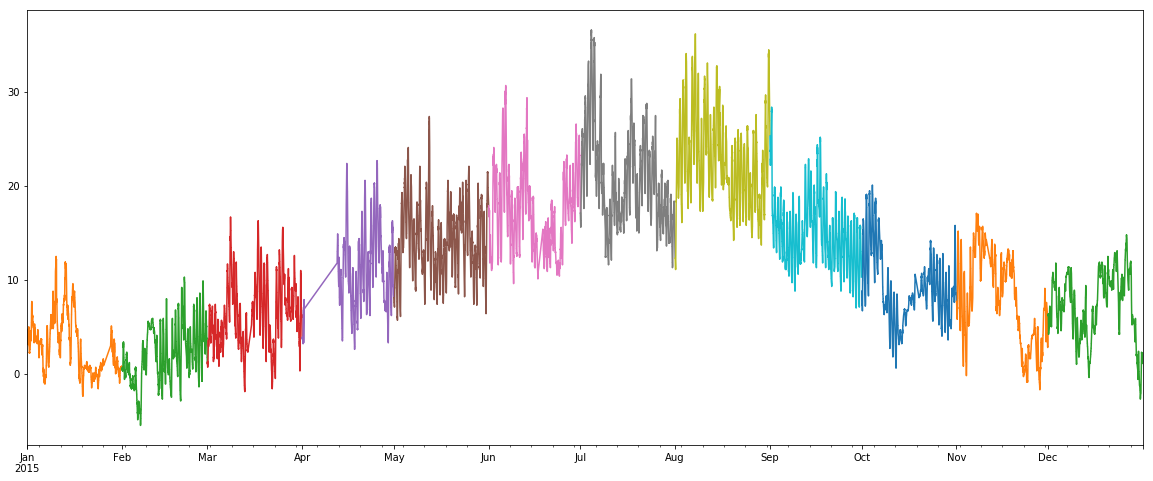

In [7]:
#Lets have a peek at the data 
#You will see there is an issue - Try to zoom in on it
#data.index = pd.to_datetime(data.index, unit='M')
plt.figure(figsize=(20,8))
#zoom=data["date":"date"]
data["temp"].resample("m").plot()  # compressing the data to monthly 
#data["2015-04-01":"2015-04-30"].head() 

There's more than 10 messed up days for IBERLINB54


index
2014-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2015-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2015-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: rain, dtype: object

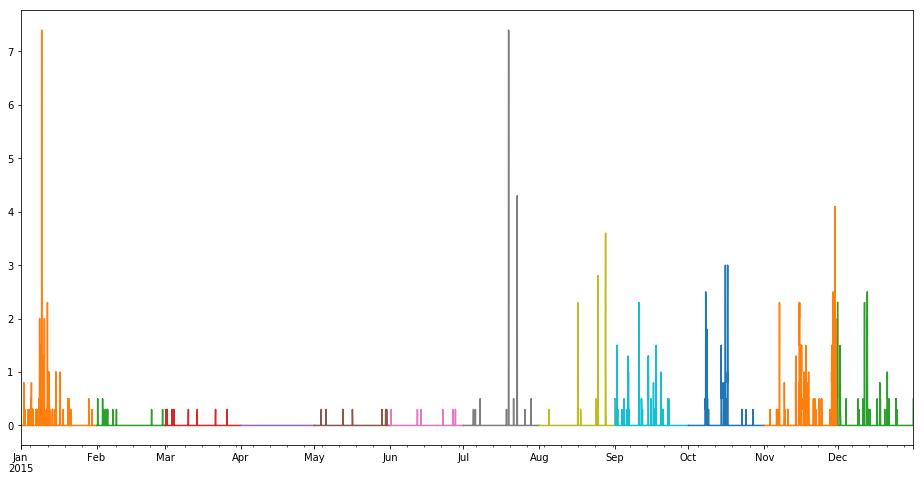

In [29]:

# There's an issue with some stations that record rainfall ~-2500 where data is missing.
if (data['rain'] < -500).sum() > 10:
    print("There's more than 10 messed up days for {}".format(station))
# remove the bad samples
    data = data[data['rain'] > -500]

#
plt.figure(figsize=(16,8))
data['rain'].resample("m").plot()

In [33]:
# get Rainy days
# If there's any rain at all, mark that!
data['raining'] = data['rain'] > 0.0
#Add some coloums
data['day'] = data['DateUTC'].apply(lambda x: x.date())
data['month'] = data['day'].apply(lambda x: x.month)
data["month_name"] = data['month'].apply(lambda x: calendar.month_abbr[x])
data.head()


TypeError: must be str, not int

March Rainy or Sunny days ? = 23
Days in the year =366
Days in the year =365


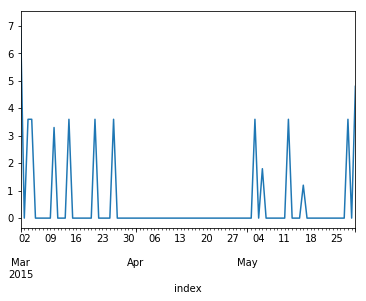

In [37]:
#Consitentcy Check
#
# Check if all the month have rainy days
#
testd = data["rain"].resample("D").sum()

#testd=testd['2015-04-01':'2015-04-30'].fillna(0)
#testd['2015-04-01':'2015-04-30'].apply(lambda x: x == False).sum() 
print("March Rainy or Sunny days ? = " +str(testd['2015-03-01':'2015-03-30'].apply(lambda x: x == 0).sum()))

testd['2015-03-01':'2015-03-30'].head(10)

testd['2015-03-01':'2015-05-30'].plot()


print("Days in the year ="+str(len(data["temp"].resample("D").sum())))  #Days 365 ???
#data1=data['2015-01-01':'2015-12-31']
#print("Days in the year ="+str(len(data1["temp"].resample("D").sum())))  #Days 365 ???

In [38]:
# Create final compressed data set for NR

mysdata=data.groupby('day')['raining'].any()
mysdata=pd.DataFrame(mysdata).reset_index()
mysdata['month'] = mysdata['day'].apply(lambda x: x.month)

mysdata=pd.DataFrame(mysdata.groupby('month')['raining'].value_counts())

mysdata.columns = ['Days']
mysdata.reset_index(inplace = True)
mysdata.columns = ['month', 'Rainy', 'Days']
mysdata.replace({"Rainy": {True: "Wet", False:"Dry"}}, inplace=True)
mysdata["month_name"] = mysdata['month'].apply(lambda x: calendar.month_abbr[x])


# Fix April adding zero rainy days
mysdata.loc[6] = [4,'Dry',30,'Apr'] 
mysdata.loc[-1] = [4,'Wet',0,'Apr']  # adding a row

mysdata = mysdata.sort_values(['month', 'Rainy'])
mysdata.reset_index(inplace = True)
del mysdata['index']
mysdata.head(24)



,month,Rainy,Days,month_name
0,1,Dry,10,Jan
1,1,Wet,20,Jan
2,2,Dry,19,Feb
3,2,Wet,9,Feb
4,3,Dry,24,Mar
5,3,Wet,7,Mar
6,4,Dry,30,Apr
7,4,Wet,0,Apr
8,5,Dry,24,May
9,5,Wet,6,May


Text(0.5, 1.0, 'Wet or Dry Commuting in IBERLINB54')

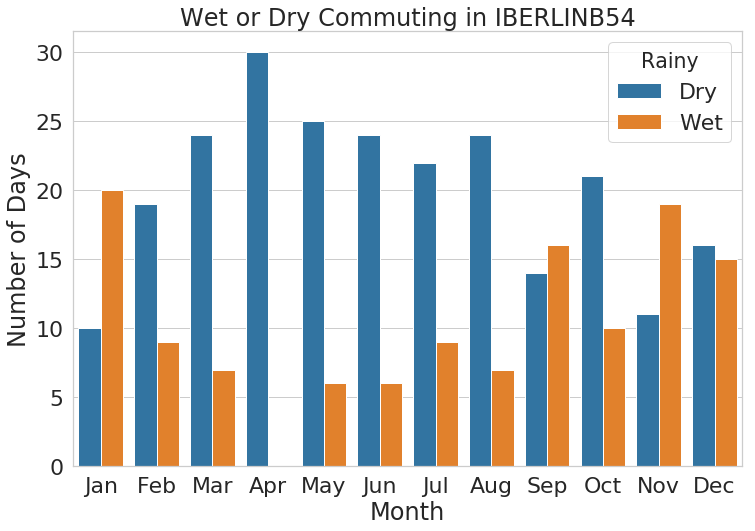

In [139]:
#Print the Final data set

import matplotlib.pyplot as plt
import seaborn as sns
# Monthly plot of rainy days
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
sns.barplot(x="month_name", y="Days", hue="Rainy", data=mysdata.sort_values(['month', 'Rainy']))
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.title("Wet or Dry Commuting in {}".format(station))


In [140]:
# play ground 
getInfo = mysdata.sort_values(['month', 'Rainy']).loc[mysdata['month_name'] == 'Apr'].to_json()

#getInfo = getInfo1.loc[getInfo1['month_name'] == 'Feb'].to_json()

#getInfo['month']=""

mvk=json.loads(getInfo)
mvk["cmd"]="getInfo"
del mvk["month"]
mvk
#getInfo1


{'Rainy': {'6': 'Dry', '7': 'Wet'},
 'Days': {'6': 30, '7': 0},
 'month_name': {'6': 'Apr', '7': 'Apr'},
 'cmd': 'getInfo'}

In [188]:
#Create commincaton with Node-RED instance 
#You need to instal the client 1st
#!pip install websocket-client
import websocket
import _thread
import time
import json

def on_open1(ws):
    ws.send("Watson Studio Listen open")

def on_open(ws):
    print("on open")
    ws.send(mysdata.loc[mysdata['month_name'] == 'Jan'])
    def run(*args):
        for i in range(10000):
            hbeat = '{"cmd":"Python NB HeartBeat"}'
            print("send cmd")
            ws.send(hbeat)
            time.sleep(1000)
            
    _thread.start_new_thread(run, ())

def on_error(ws, error):
    print(error)

def on_close(ws):
    print("closed")
    ws.send("Watson Studio Listen End")

def on_message(ws, message):
    print(message)
    wet=-1
    kw=0
    dry=-1
    kd=0
    try:
        datain = json.loads(message)
        print(datain['cmd'])
        # do the required stuff
        # add more iformation maybe even the min/max temperature of the year
        if (datain['cmd'] == 'getInfo'):
            getInfo = '{"cmd":"getInfo","tablesize":'+str(len(mysdata))+'}'
            print(getInfo)
            ws.send(getInfo)
            
        if (datain['cmd'] == 'getJan'):          
            getInfo = mysdata.loc[mysdata['month_name'] == 'Jan'].to_json()
            mvk=json.loads(getInfo)
            mvk["cmd"]=datain['cmd']
            del mvk["month"]
            print(mvk)
            ws.send(json.dumps(mvk))
        #Generic Month  
        if (datain['cmd'] == 'getTemp'):
            month = datain['month']
            temp = monthly.loc[monthly['month_name'] == month]['temp'][0]
            humidity = monthly.loc[monthly['month_name'] == 'Feb']['humidity'][0]
            getInfo = '{"cmd":"getTemp","temp":'+str(temp)+',"humidity":'+str(humidity)+'}'                  
            print(getInfo)
            ws.send(getInfo)
#Genric month                          
        if (datain['cmd'] == 'getMonth'):
            month = datain['month']
            print(month)
            getInfo = mysdata.loc[mysdata['month_name'] == month]['Days'].to_json()
            print(getInfo)
            mvk=json.loads(getInfo)
            
            for k, v in mvk.items():
    
                if(dry==-1):
                    dry=v    
                    kd=k                    
                else:
                    wet=v
                    kw=k

            del mvk[kd] 
            del mvk[kw]
            mvk["month"]=month
            mvk["cmd"]=datain['cmd']
            mvk["dry"]=dry
            mvk["wet"]=wet
            print(mvk)
            ws.send(json.dumps(mvk))
            
        if (datain['cmd'] == 'getAll'): 
            mysdata.to_json()
       
            
    except:
        print("Error no json  / no  valid command")
####   ws://thinklab2020nr.mybluemix.net/ws/myweather/"
#### use your own isntance 
def start_websocket_listener():
    #websocket.enableTrace(True)
    ws = websocket.WebSocketApp("ws://thinklab2020nr.mybluemix.net/ws/myweather/", #<<<<<<< ADJUST
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close)
    print("connecting")
   # ws.send("Watson Studio Listen open")
    ws.on_open = on_open
    ws.run_forever()

start_websocket_listener() 

--- request header ---
GET /ws/myweather/ HTTP/1.1
Upgrade: websocket
Host: thinklab2020nr.mybluemix.net
Origin: http://thinklab2020nr.mybluemix.net
Sec-WebSocket-Key: oHdIEps0907kh4qxUQQV0g==
Sec-WebSocket-Version: 13
Connection: upgrade


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Connection: Upgrade
Sec-WebSocket-Accept: z7TwN6a1Yx6hzmb+O0dhmpynvm0=
Date: Fri, 17 Apr 2020 18:06:55 GMT
X-Global-Transaction-ID: cb47d0745e99f03f0ce529e1
Upgrade: websocket
-----------------------
error from callback <function on_open at 0x7efcf26cf9d8>: ufunc 'add' did not contain a loop with signature matching types dtype('S21') dtype('S21') dtype('S21')


connecting
on open


  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_app.py", line 346, in _callback
    callback(self, *args)
  File "<ipython-input-188-0efbf0a8309c>", line 14, in on_open
    ws.send(mysdata.loc[mysdata['month_name'] == 'Jan'])
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_app.py", line 154, in send
    if not self.sock or self.sock.send(data, opcode) == 0:
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_core.py", line 253, in send
    return self.send_frame(frame)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_core.py", line 272, in send_frame
    data = frame.format()
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_abnf.py", line 242, in format
    return frame_header + self._get_masked(mask_key)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_abnf.py", line 245, in _get_masked
    s = ABNF.mask(mask_key, self.data)
  File "/opt/conda/envs/P

{"cmd":"getTemp","month":"Feb"}
getTemp
{"cmd":"getTemp","temp":10.3,"humidity":95.0}


send: b'\x81\xb8#\xd0\xd4\xc9X\xf2\xb9\xa6M\xa4\xbc\xeb\x19\xf0\xf6\x88S\xa2\xf6\xe5\x03\xf2\xb7\xa4G\xf2\xee\xe9\x01\xb7\xb1\xbdn\xbf\xba\xbdK\xf2\xf8\xe9\x01\xb4\xa6\xb0\x01\xea\xf4\xfa\x13\xfc\xf4\xebT\xb5\xa0\xeb\x19\xf0\xe4\xb4'


{"cmd":"getMonth","month":"Apr"}
getMonth
Apr
{"6":30,"7":0}
{'month': 'Apr', 'cmd': 'getMonth', 'dry': 30, 'wet': 0}


send: b"\x81\xad\xbfN^\x90\xc4l=\xfd\xdbld\xb2\xd8+*\xc4\xda#.\xb2\x93l*\xf5\xd2>|\xaa\x8dyp\xa4\x93l6\xe5\xd2':\xf9\xcb7|\xaa\x86{p\xa0\xc2"
send: b'\x81\xb8\xf4\xc6\x89\xd4\x8f\xe4\xe4\xbb\x9a\xb2\xe1\xf6\xce\xe6\xab\x99\x95\xbf\xab\xf8\xd4\xe4\xea\xb9\x90\xe4\xb3\xf4\xd6\xa1\xec\xa0\xb9\xa9\xe7\xa0\x9c\xe4\xa5\xf4\xd6\xa2\xfb\xad\xd6\xfc\xa9\xe6\xc1\xea\xa9\xf6\x83\xa3\xfd\xf6\xce\xe6\xbf\xa9'


{"cmd":"getTemp","month":"May"}
getTemp
{"cmd":"getTemp","temp":27.4,"humidity":95.0}
{"cmd":"getMonth","month":"May"}
getMonth
May
{"8":25,"9":6}
{'month': 'May', 'cmd': 'getMonth', 'dry': 25, 'wet': 6}


send: b'\x81\x98\x8c=\x91\xaa\xdb\\\xe5\xd9\xe3S\xb1\xf9\xf8H\xf5\xc3\xe3\x1d\xdd\xc3\xffI\xf4\xc4\xacx\xff\xce'
error from callback <function on_close at 0x7efd143fbae8>: socket is already closed.


Connection is already closed.
closed


  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_app.py", line 346, in _callback
    callback(self, *args)
  File "<ipython-input-188-0efbf0a8309c>", line 29, in on_close
    ws.send("Watson Studio Listen End")
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_app.py", line 154, in send
    if not self.sock or self.sock.send(data, opcode) == 0:
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_core.py", line 253, in send
    return self.send_frame(frame)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_core.py", line 279, in send_frame
    l = self._send(data)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_core.py", line 449, in _send
    return send(self.sock, data)
  File "/opt/conda/envs/Python36/lib/python3.6/site-packages/websocket/_socket.py", line 135, in send
    raise WebSocketConnectionClosedException("socket is already closed.")
